In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
from scipy.stats import linregress
import numpy as np

data_path = os.path.join('..','merge_data','merged_data.csv')

In [2]:
df = pd.read_csv(data_path)
df.head()

,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,Property Type,First,Race,Gender,Age,Credit Score
0,2009,21,117,148000,75322,0.0488,1.1378,0.80,PT01,2,5,1,36,5
1,2009,21,15,197500,141050,0.0475,2.1307,0.72,PT01,2,5,1,59,5
2,2009,21,117,219000,106017,0.0475,1.6015,0.70,PT01,2,5,2,27,5
3,2009,21,37,244000,125539,0.0500,1.8964,0.80,PT01,2,5,1,32,5
4,2009,21,15,417000,360272,0.0450,5.4422,0.35,PT01,2,5,1,46,5


<Figure size 432x288 with 0 Axes>

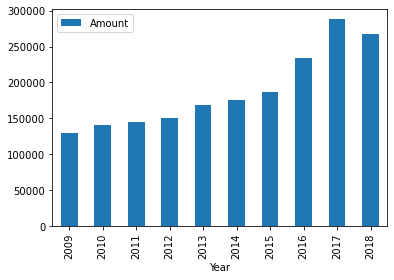

In [3]:
# plot amount median per year
df_year_g = df.groupby(['Year'])
med_amount_df = df_year_g['Amount'].median().reset_index()

plt.figure()
med_amount_df.plot(kind='bar',x='Year',y='Amount')

<Figure size 432x288 with 0 Axes>

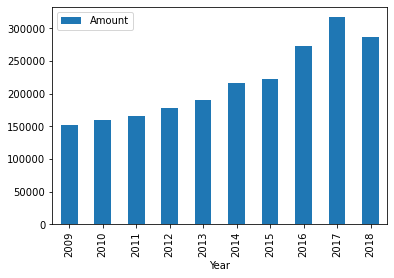

In [4]:
# plot amount average per year
df_year_g = df.groupby(['Year'])
avg_amount_df = df_year_g['Amount'].mean().reset_index()

plt.figure()
avg_amount_df.plot(kind='bar',x='Year',y='Amount')

<Figure size 432x288 with 0 Axes>

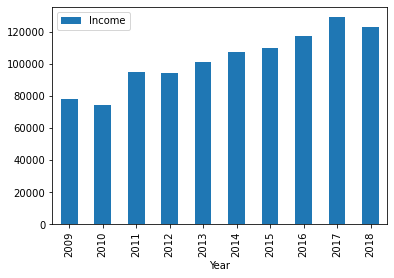

In [5]:
# Income over the years
df_year_g = df.groupby(['Year'])
avg_income_df = df_year_g['Income'].mean().reset_index()

plt.figure()
avg_income_df.plot(kind='bar',x='Year',y='Income')

<Figure size 432x288 with 0 Axes>

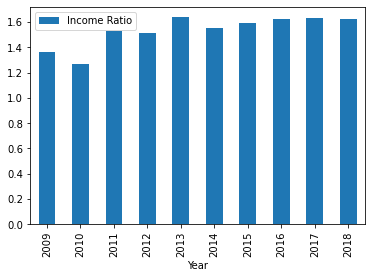

In [6]:
# income ratio over the years
df_year_g = df.groupby(['Year'])
avg_incomeratio_df = df_year_g['Income Ratio'].mean().reset_index()

plt.figure()
avg_incomeratio_df.plot(kind='bar',x='Year',y='Income Ratio')

<Figure size 432x288 with 0 Axes>

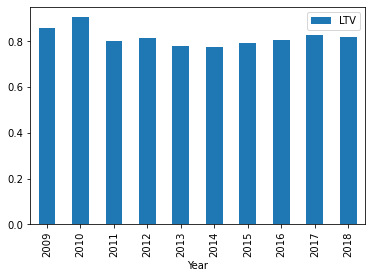

In [7]:
# Look at LTV over the years
df_year_g = df.groupby(['Year'])
avg_LTV_df = df_year_g['LTV'].mean().reset_index()

plt.figure()
avg_LTV_df.plot(kind='bar',x='Year',y='LTV')

In [8]:

years = df['Year'].unique()
slopes = []
intercepts = []
rvals = []
pvals = []
ratio = []
for year in years:
    temp_df = df.loc[df['Year'] == year,:]
    temp_df = temp_df.loc[temp_df['Income']<100000,:]
    ratio.append(temp_df['Amount'].median()/temp_df['Income'].median())
    slope, intercept, r_value, p_value, std_err = linregress(temp_df['Income'],temp_df['Amount'])
    slopes.append(slope)
    intercepts.append(intercept)
    rvals.append(r_value)
    pvals.append(p_value)

(2.0, 3.2)

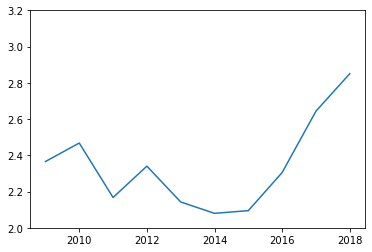

In [9]:
plt.figure()
plt.plot(years,ratio)
plt.ylim(2,3.2)

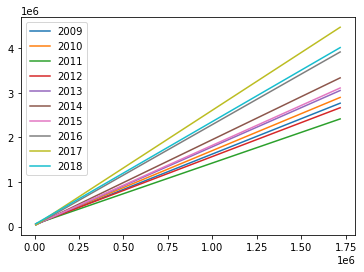

In [10]:
plt.figure()
max_income = df['Income'].max()
min_income = df['Income'].min()
max_amount = df['Amount'].max()
min_amount = df['Amount'].min()
X = np.linspace(min_income,max_income,250)
for i in range(0,len(years)):
    plt.plot(X,slopes[i]*X + intercepts[i],label=str(years[i]))

# plt.xlim(min_income,max_income)
# plt.ylim(min_amount,max_amount)
plt.legend()
plt.show()

In [11]:
def ia_ratio(df,year):
    # get df of just one year
    df2 = df.loc[df['Year'] == year,:]
    df2 = df2.loc[df2['Income']<500000,:]
    df2 = df2.loc[df2['Race'] == 3,:]
    # get max values
    max_income = df2['Income'].max()
    min_income = df2['Income'].min()
    max_amount = df2['Amount'].max()
    min_amount = df2['Amount'].min()
    # get x range for plotting the linregression
    X = np.linspace(min_income,max_income,250)
    # get the linregression stats
    slope, intercept, r_value, p_value, std_err = linregress(df2['Income'],df2['Amount'])
    # plot everything
    plt.figure()
    plt.scatter(df2['Income'],df2['Amount'])
    plt.plot(X,slope*X + intercept,label=f'y={slope}*x + {intercept}')
    plt.title(f'The Amount vs Income for {year}')
    plt.xlabel('Income')
    plt.ylabel('Amount')
    plt.legend()
    plt.show()
    print(slope,r_value)

slopes [1.586168127199656, 1.6590697698456074, 1.376274148285948, 1.5226230142776753, 1.7563119632038258, 1.9273320735180524, 1.7890569762656103, 2.266018712733801, 2.5892314386192297, 2.308711355570359]
rvals [0.5991604832816341, 0.5976910159541213, 0.525171061988798, 0.5290863903577756, 0.5640400338659657, 0.5420600981715055, 0.5263396709487266, 0.5276807850267969, 0.5819031153755343, 0.5639271605503665]


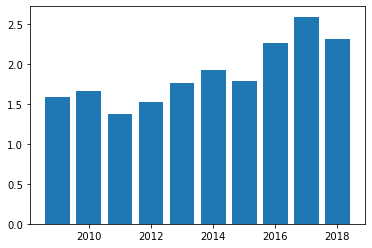

In [12]:
plt.bar(years,slopes)
print('slopes',slopes)
print('rvals',rvals)


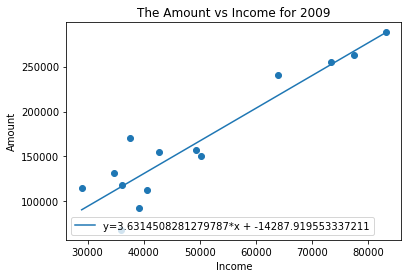

3.6314508281279787 0.9306791131645344


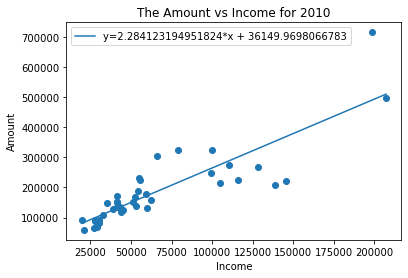

2.284123194951824 0.8566792802346225


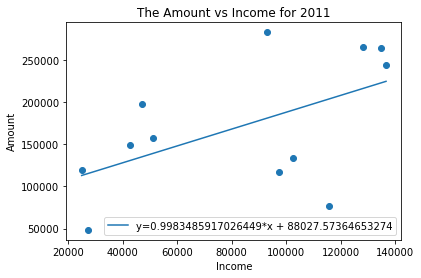

0.9983485917026449 0.5403632796703336


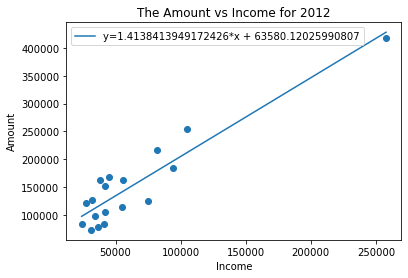

1.4138413949172426 0.9247962867929646


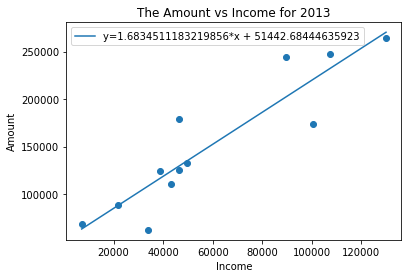

1.6834511183219856 0.9127682601322273


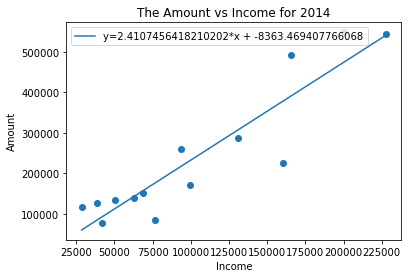

2.4107456418210202 0.9154419541725929


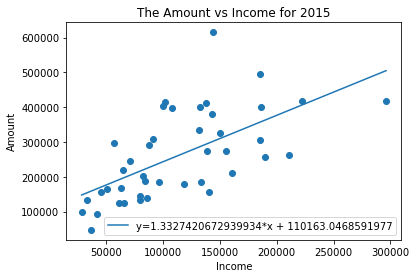

1.3327420672939934 0.6206494888191445


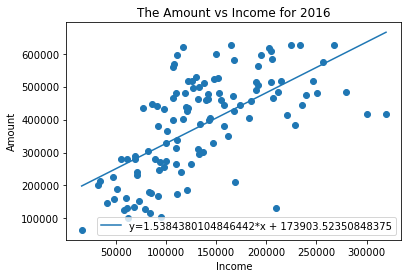

1.5384380104846442 0.6327329982637523


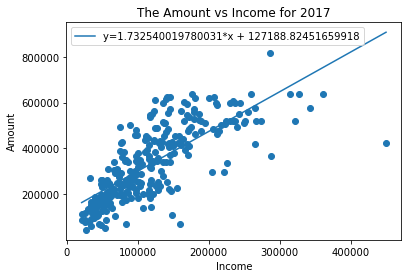

1.732540019780031 0.7537413348098623


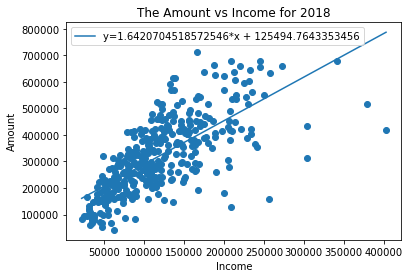

1.6420704518572546 0.705630731191731


In [13]:
for year in years:
    ia_ratio(df,int(year))

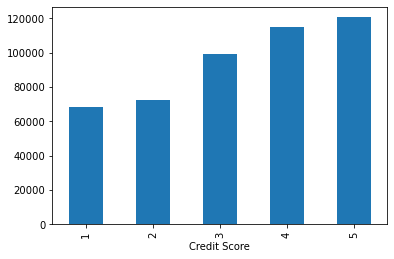

In [14]:
credit = df.groupby(['Credit Score'])
credit['Income'].mean().plot(kind='bar')